In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

In [42]:
def alpha2F(wlist,lamdavwphon_array,sigma):
    alpha2F_array = np.zeros(wlist.shape)
    i=0
    for w in wlist:
        for wlam in lamdavwphon_array:
            alpha2F_array[i] = alpha2F_array[i]+ (wlam[1] * w * gaussian(w,wlam[0],sigma))
        i=i+1
    return(alpha2F_array)

In [43]:
# Assuming your CSV file is named 'data.csv'
file_path1 = './H3S/calc_qe/p200GPa/testv0-2/lamdaqnu_q-0-0-0.csv'
file_path2 = './H3S/calc_qe/p200GPa/testv0-2/lamdaqnu_q-0-0-5.csv'
file_path3 = './H3S/calc_qe/p200GPa/testv0-2/lamdaqnu_q-5-5-5.csv'

# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv(file_path1, sep='\t', header=None, names=['Column1', 'Column2'])
df2 = pd.read_csv(file_path2, sep='\t', header=None, names=['Column1', 'Column2'])
df3 = pd.read_csv(file_path3, sep='\t', header=None, names=['Column1', 'Column2'])


lamda1= df1.values
lamda2= df2.values
lamda3= df3.values


In [124]:
dw=1.0
wlist = np.arange(0.0,270,dw)
width = 10
alpha2Fq1 = (4/32)*alpha2F(wlist,lamda1,width)/2
alpha2Fq2 = (24/32)*alpha2F(wlist,lamda2,width)/2
alpha2Fq3 = (4/32)*alpha2F(wlist,lamda3,width)/2

alpha2Ftot = alpha2Fq1+alpha2Fq2+alpha2Fq3

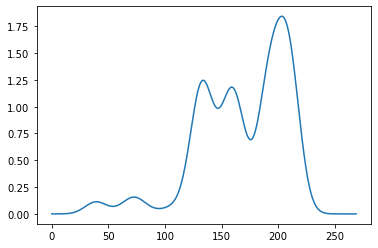

In [125]:
# Plot the Gaussian
plt.plot(wlist, alpha2Ftot)

plt.show()

In [126]:
lamda = np.zeros(wlist.shape)
for i in range(len(wlist)):
    dlamda = 2*(dw*alpha2Ftot[i]/(wlist[i]+0.1))
    lamda[i] = lamda[i-1] + dlamda

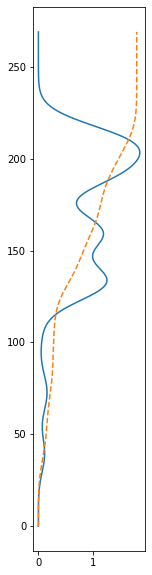

In [127]:
fig, axs = plt.subplots(ncols=1, figsize=(2, 10))  # a figure with a single Axes
axs.plot(alpha2Ftot,wlist)
axs.plot(lamda,wlist, linestyle="--")

plt.show()

In [128]:
# Assuming your CSV file is named 'data.csv'
file_path1 = './H3S/calc_qe/p200GPa/testv0-2/H3S_paper_a2F_extracted.csv'

# Read the CSV file into a pandas DataFrame
dfa2f = pd.read_csv(file_path1, sep=',', header=None, names=['Column1', 'Column2'])

a2f_paper = dfa2f.to_numpy()
sorted_indices = np.argsort(a2f_paper[:,1])
a2f_paper= a2f_paper[sorted_indices].T
print(a2f_paper[1])

[ 14.13829632  20.29849747  26.05639977  29.57651471  35.31073446
  38.77910092  42.2154036   45.71875609  49.99318138  52.61299435
  56.59758751  58.47498214  62.59854536  64.97175141  67.31717563
  70.26836158  71.71731931  73.79943503  75.52658655  79.0960452
  81.21468927  84.03772161  87.21751412  90.32364115  93.77910092
  96.23240551  99.05687869 103.29777908 105.36794191 105.66128482
 107.08729057 108.17565264 109.46327684 109.81638418 111.5819209
 114.05367232 116.52542373 117.22737678 118.88127205 121.91415839
 122.75898597 123.51329632 124.51904344 125.81214689 129.14548023
 131.39164881 132.18786528 133.86411049 136.04322927 136.21923502
 137.35875706 138.59950321 139.83050847 140.18361582 141.49940743
 142.65536723 144.06779661 147.77694574 149.36937869 151.33896682
 154.1428679  155.44576758 157.26868425 159.77048023 162.56980973
 167.63207026 172.83681164 174.82316222 176.6502695  178.70366988
 182.41236241 186.24677333 188.67732888 189.93451279 190.85644766
 191.8202886

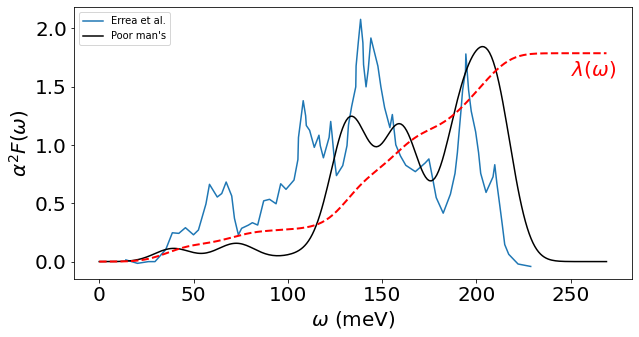

In [152]:
fig, axs = plt.subplots(ncols=1, figsize=(10, 5))  # a figure with a single Axes
axs.plot(a2f_paper[1],a2f_paper[0],label="Errea et al.")
axs.plot(wlist,alpha2Ftot,color="black",label="Poor man's")
axs.plot(wlist,lamda, color="red",linestyle="--",linewidth=2.0)

# xmin = 0
# xmax = 3
# ymin = 0
# ymax = 275
# axs.set_xlim(xmin,xmax)
# axs.set_ylim(ymin,ymax)

axs.tick_params(axis='both', which='major', labelsize=20)
axs.set_xlabel('$\omega$ (meV)',fontsize=20)
axs.set_ylabel('$\\alpha^2F(\omega)$',fontsize=20)
axs.legend(loc="upper left")

axs.annotate("$\lambda(\omega)$",(250,1.6),fontsize=20,color="red")
plt.savefig('H3S_200GPa_alpha2F.p') 

plt.show()